In [6]:
%matplotlib notebook

from study_rsfs.run_svm import SVMRunner
from study_rsfs.load_data import RSFDataLoader

### July 15 (summer week 3 in notes)
training SVM on separate RSFs and predicting % that is liquid in mixed RSFs data
#### set up and constants

In [7]:
# RUN FOR SMALL SIGMA (OLDER DATA)
MIXED_RSFS_FNAME = 'rsfs_mixed_250k_1960000.dat'

loader = RSFDataLoader()
X_train, y_train = loader.load_rsfs_liq_sol()

In [10]:
# RUN FOR LARGER SIGMA (NEWER DATA)
MIXED_RSFS_FNAME = 'rsfs_mixed_bigsigma_250k_1960000.dat'
LIQ_FNAME = 'rsf_big_sigma_liq_10000.dat'
ICE_FNAME = 'rsf_big_sigma_ice_10000.dat'

loader = RSFDataLoader()
X_train, y_train = loader.load_rsfs_liq_sol(liq_fname=LIQ_FNAME, sol_fname=ICE_FNAME)

#### analysis with predicted % and decision function plots

In [11]:
# X_mixed, _ = loader.load_rsfs(MIXED_RSFS_FNAME)
X_mixed, _ = loader.load_rsfs(MIXED_RSFS_BIGSIGMA_FNAME)

reg_whiten_svm = SVMRunner(X_train, y_train)
# no whiten, purely for plotting purposes
reg_no_whiten_svm = SVMRunner(X_train, y_train, whiten_data=False)

In [12]:
# with whitening
reg_whiten_svm.validate_simple(X_mixed)
# without whitening
reg_no_whiten_svm.validate_simple(X_mixed)

Linear SVM with C=10
	62.9764% positive predictions
Linear SVM with C=10
	63.827% positive predictions


<IPython.core.display.Javascript object>


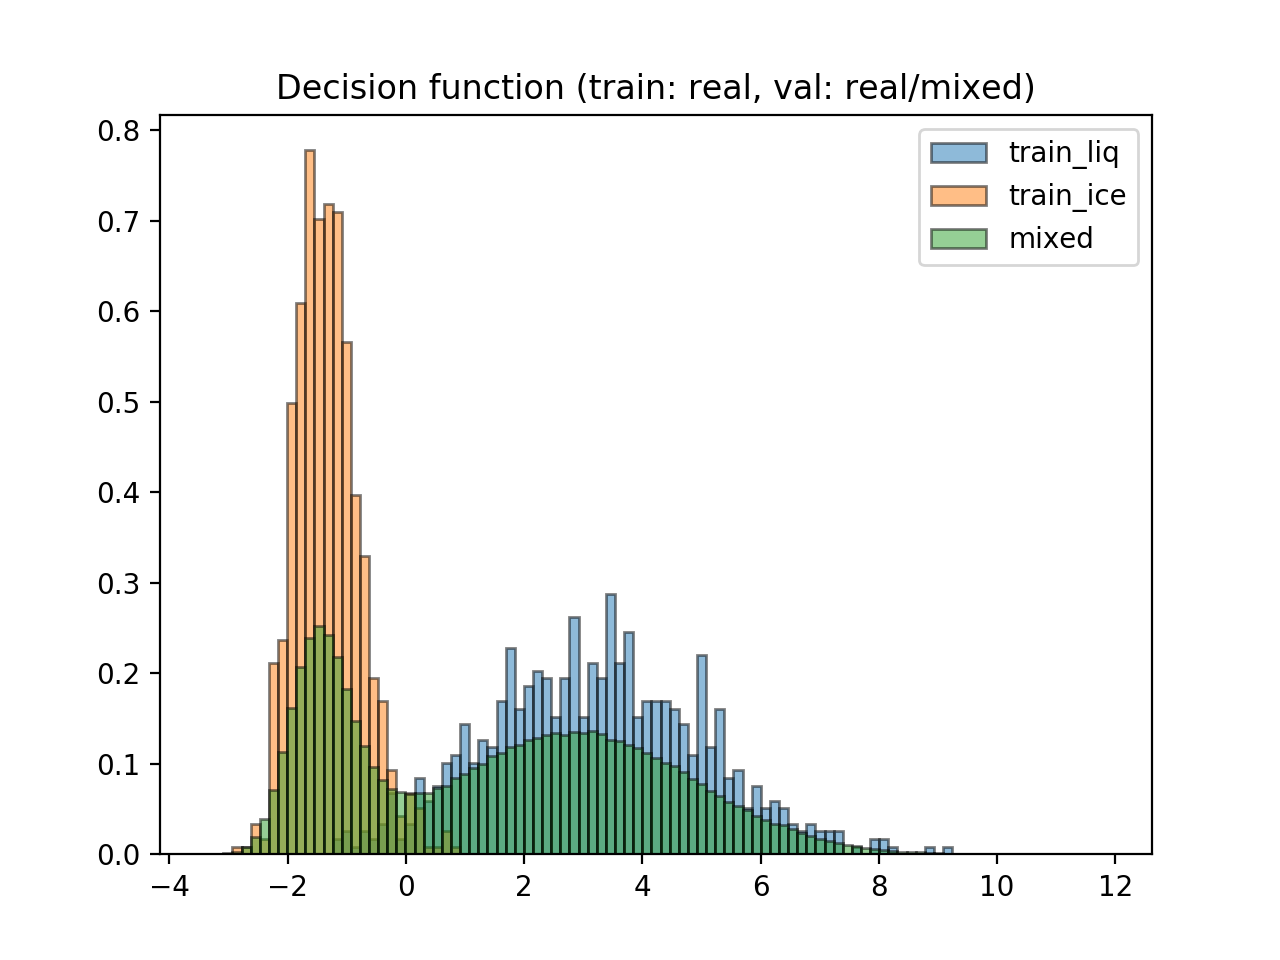

> /home/users/hchung98/rsf_code_and_data/study_rsfs/run_svm.py(45)plot_confidence()
-> maxconf = 0; minconf = 0
(Pdb) c


In [13]:
# show decision function
reg_no_whiten_svm.plot_confidence(plot_train=True, 
                                  X_val=X_mixed,
                                  title='Decision function (train: real, val: real/mixed)')

<IPython.core.display.Javascript object>


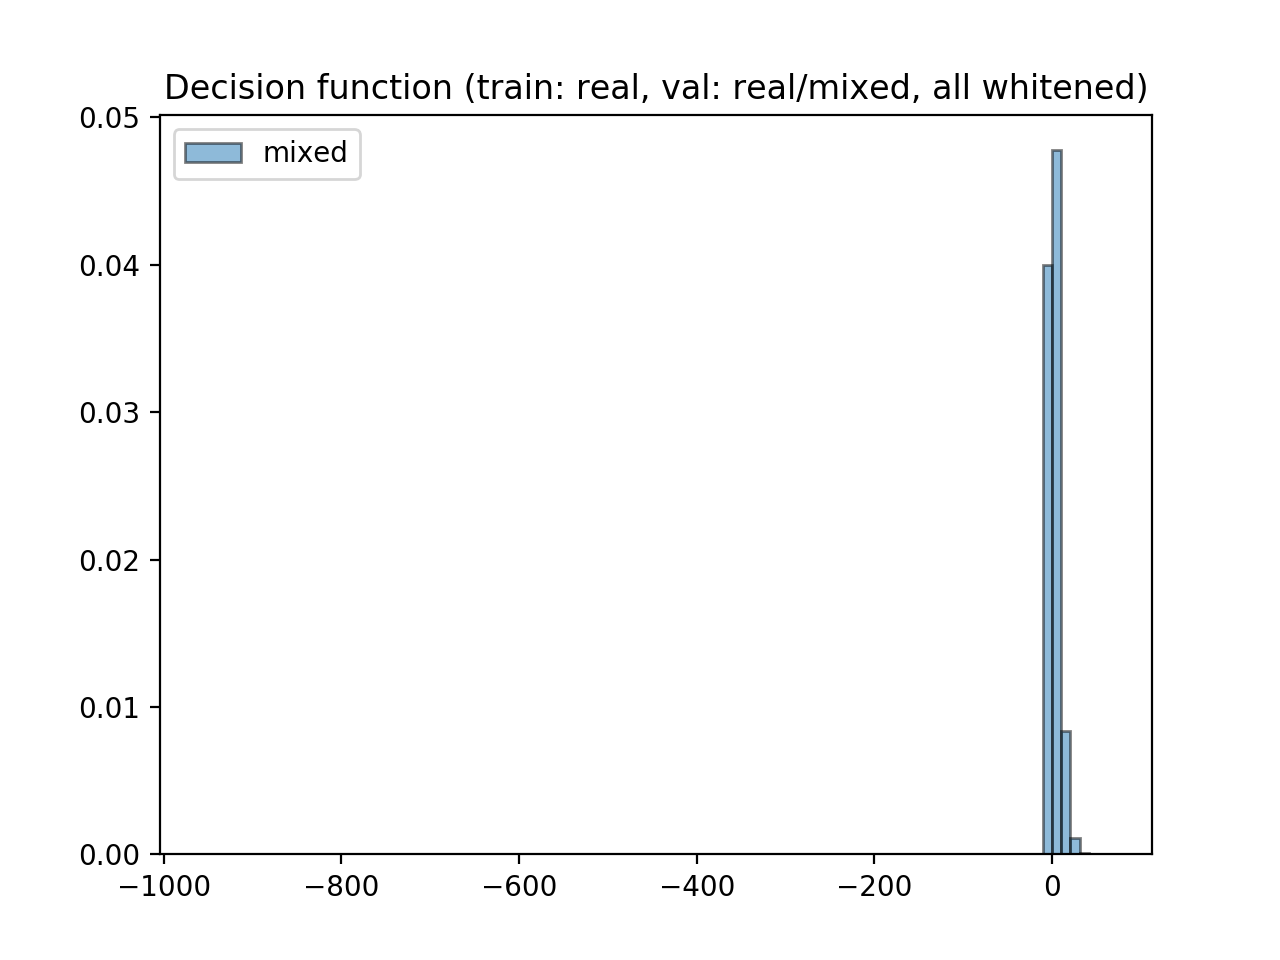

> /home/users/hchung98/rsf_code_and_data/study_rsfs/run_svm.py(45)plot_confidence()
-> maxconf = 0; minconf = 0
(Pdb) n
> /home/users/hchung98/rsf_code_and_data/study_rsfs/run_svm.py(46)plot_confidence()
-> if len(X_val):
(Pdb) 
> /home/users/hchung98/rsf_code_and_data/study_rsfs/run_svm.py(47)plot_confidence()
-> conf_val, maxconf, minconf = self._calc_confidence(X_val, trim_std)
(Pdb) 
> /home/users/hchung98/rsf_code_and_data/study_rsfs/run_svm.py(48)plot_confidence()
-> if plot_train:
(Pdb) conf_val > -1.57e64
array([ True,  True,  True, ...,  True,  True,  True])
(Pdb) conf_val[conf_val > -1.57e64]
array([2.48538166, 0.56340304, 7.14561013, ..., 5.16877791, 1.93849513,
       1.82186471])
(Pdb) np.histogram(conf_val[conf_val > -1.57e64])
(array([     2,      0,      0,      0,      0,      0,      0,      0,
            0, 499996]), array([-6.49971410e+62, -5.84974269e+62, -5.19977128e+62, -4.54979987e+62,
       -3.89982846e+62, -3.24985705e+62, -2.59988564e+62, -1.94991423e+62,
 

In [4]:
# decision function with whitening and trimmed
reg_whiten_svm.plot_confidence(#plot_train=True, 
                               X_val=X_mixed,
                               trim_std=1000,
                               title='Decision function (train: real, val: real/mixed, all whitened)')

#### density estimation of rsfs

In [25]:
import pandas as pd
pd.options.display.max_rows = 4000

X_ice, _ = loader.load_rsfs(ICE_FNAME)
X_liq, _ = loader.load_rsfs(LIQ_FNAME)

In [26]:
X_ice.mean()

mu0.00     0.000004
mu0.10     0.000011
mu0.20     0.000030
mu0.30     0.000075
mu0.40     0.000180
mu0.50     0.000419
mu0.60     0.000940
mu0.70     0.002028
mu0.80     0.004216
mu0.90     0.008441
mu1.00     0.016276
mu1.10     0.030229
mu1.20     0.054082
mu1.30     0.093203
mu1.40     0.154736
mu1.50     0.247487
mu1.60     0.381358
mu1.70     0.566183
mu1.80     0.809934
mu1.90     1.116454
mu2.00     1.483091
mu2.10     1.898811
mu2.20     2.343454
mu2.30     2.788727
mu2.40     3.201201
mu2.50     3.547140
mu2.60     3.798456
mu2.70     3.938689
mu2.80     3.967761
mu2.90     3.904427
mu3.00     3.785790
mu3.10     3.663864
mu3.20     3.599681
mu3.30     3.655876
mu3.40     3.888774
mu3.50     4.340993
mu3.60     5.035389
mu3.70     5.971025
mu3.80     7.121670
mu3.90     8.437186
mu4.00     9.847873
mu4.10    11.271496
mu4.20    12.622203
mu4.30    13.820110
mu4.40    14.800099
mu4.50    15.518437
mu4.60    15.956292
mu4.70    16.119894
mu4.80    16.037830
mu4.90    15.756442


In [27]:
X_ice.cov()

,mu0.00,mu0.10,mu0.20,mu0.30,mu0.40,mu0.50,mu0.60,mu0.70,mu0.80,mu0.90,...,mu5.10,mu5.20,mu5.30,mu5.40,mu5.50,mu5.60,mu5.70,mu5.80,mu5.90,mu6.00
mu0.00,1.292576e-11,3.310656e-11,8.147379e-11,1.926303e-10,4.375061e-10,9.544143e-10,1.999462e-09,4.021889e-09,7.765857e-09,1.439043e-08,...,-3.610877e-07,-3.195467e-07,-2.641288e-07,-1.992508e-07,-1.282148e-07,-5.362148e-08,2.184768e-08,9.464343e-08,1.599083e-07,2.116273e-07
mu0.10,3.310656e-11,8.487562e-11,2.090765e-10,4.948099e-10,1.124947e-09,2.456559e-09,5.151743e-09,1.037363e-08,2.005205e-08,3.719816e-08,...,-9.616894e-07,-8.502174e-07,-7.007590e-07,-5.253834e-07,-3.333347e-07,-1.320285e-07,7.098307e-08,2.660190e-07,4.401622e-07,5.776662e-07
mu0.20,8.147379e-11,2.090765e-10,5.155299e-10,1.221296e-09,2.779436e-09,6.075781e-09,1.275522e-08,2.571178e-08,4.975506e-08,9.240321e-08,...,-2.459727e-06,-2.172718e-06,-1.785936e-06,-1.330997e-06,-8.326471e-07,-3.110605e-07,2.134200e-07,7.154386e-07,1.161956e-06,1.513312e-06
mu0.30,1.926303e-10,4.948099e-10,1.221296e-09,2.896210e-09,6.598054e-09,1.443842e-08,3.034399e-08,6.123403e-08,1.186270e-07,2.205611e-07,...,-6.041572e-06,-5.332601e-06,-4.372155e-06,-3.239642e-06,-1.998443e-06,-7.009717e-07,6.003351e-07,1.841709e-06,2.941874e-06,3.804735e-06
mu0.40,4.375061e-10,1.124947e-09,2.779436e-09,6.598054e-09,1.504735e-08,3.296329e-08,6.935199e-08,1.401083e-07,2.717370e-07,5.058231e-07,...,-1.424945e-05,-1.256942e-05,-1.028113e-05,-7.575799e-06,-4.608804e-06,-1.510298e-06,1.590321e-06,4.539069e-06,7.143690e-06,9.180184e-06
mu0.50,9.544143e-10,2.456559e-09,6.075781e-09,1.443842e-08,3.296329e-08,7.228971e-08,1.522611e-07,3.079551e-07,5.979647e-07,1.114395e-06,...,-3.226984e-05,-2.845136e-05,-2.322090e-05,-1.702000e-05,-1.021335e-05,-3.110044e-06,3.984164e-06,1.071227e-05,1.663700e-05,2.125614e-05
mu0.60,1.999462e-09,5.151743e-09,1.275522e-08,3.034399e-08,6.935199e-08,1.522611e-07,3.210664e-07,6.501235e-07,1.263853e-06,2.358214e-06,...,-7.016216e-05,-6.183930e-05,-5.037089e-05,-3.673446e-05,-2.174968e-05,-6.118815e-06,9.466090e-06,2.421047e-05,3.715825e-05,4.722644e-05
mu0.70,4.021889e-09,1.037363e-08,2.571178e-08,6.123403e-08,1.401083e-07,3.079551e-07,6.501235e-07,1.317981e-06,2.565263e-06,4.792384e-06,...,-1.464406e-04,-1.290483e-04,-1.049310e-04,-7.616362e-05,-4.451068e-05,-1.149911e-05,2.137061e-05,5.240100e-05,7.958286e-05,1.006703e-04
mu0.80,7.765857e-09,2.005205e-08,4.975506e-08,1.186270e-07,2.717370e-07,5.979647e-07,1.263853e-06,2.565263e-06,4.999050e-06,9.350839e-06,...,-2.933628e-04,-2.585268e-04,-2.098945e-04,-1.516875e-04,-8.754376e-05,-2.064126e-05,4.590334e-05,1.086096e-04,1.634199e-04,2.058566e-04
mu0.90,1.439043e-08,3.719816e-08,9.240321e-08,2.205611e-07,5.058231e-07,1.114395e-06,2.358214e-06,4.792384e-06,9.350839e-06,1.751332e-05,...,-5.639607e-04,-4.971067e-04,-4.030956e-04,-2.901604e-04,-1.654844e-04,-3.539969e-05,9.389222e-05,2.155438e-04,3.216829e-04,4.037272e-04


In [28]:
X_liq.mean()

mu0.00     0.000001
mu0.10     0.000004
mu0.20     0.000010
mu0.30     0.000025
mu0.40     0.000063
mu0.50     0.000151
mu0.60     0.000350
mu0.70     0.000779
mu0.80     0.001672
mu0.90     0.003461
mu1.00     0.006910
mu1.10     0.013307
mu1.20     0.024719
mu1.30     0.044302
mu1.40     0.076614
mu1.50     0.127871
mu1.60     0.206014
mu1.70     0.320477
mu1.80     0.481498
mu1.90     0.698939
mu2.00     0.980643
mu2.10     1.330545
mu2.20     1.746898
mu2.30     2.221079
mu2.40     2.737442
mu2.50     3.274519
mu2.60     3.807590
mu2.70     4.312285
mu2.80     4.768560
mu2.90     5.164193
mu3.00     5.497035
mu3.10     5.775455
mu3.20     6.016873
mu3.30     6.244698
mu3.40     6.484331
mu3.50     6.759032
mu3.60     7.086421
mu3.70     7.476128
mu3.80     7.928835
mu3.90     8.436683
mu4.00     8.984795
mu4.10     9.553588
mu4.20    10.121493
mu4.30    10.667746
mu4.40    11.174933
mu4.50    11.631027
mu4.60    12.030709
mu4.70    12.375833
mu4.80    12.675010
mu4.90    12.942396


In [29]:
X_liq.cov()

,mu0.00,mu0.10,mu0.20,mu0.30,mu0.40,mu0.50,mu0.60,mu0.70,mu0.80,mu0.90,...,mu5.10,mu5.20,mu5.30,mu5.40,mu5.50,mu5.60,mu5.70,mu5.80,mu5.90,mu6.00
mu0.00,2.982102e-12,7.838619e-12,1.980741e-11,4.811410e-11,1.123452e-10,2.521438e-10,5.439031e-10,1.127540e-09,2.246086e-09,4.298694e-09,...,-3.805006e-08,-1.183320e-07,-1.742177e-07,-2.043245e-07,-2.095257e-07,-1.924688e-07,-1.570221e-07,-1.077516e-07,-4.950276e-08,1.289187e-08
mu0.10,7.838619e-12,2.062354e-11,5.216402e-11,1.268379e-10,2.964681e-10,6.660901e-10,1.438406e-09,2.985257e-09,5.953613e-09,1.140802e-08,...,-8.528302e-08,-3.041630e-07,-4.584931e-07,-5.443358e-07,-5.637365e-07,-5.234543e-07,-4.335110e-07,-3.058284e-07,-1.531414e-07,1.176132e-08
mu0.20,1.980741e-11,5.216402e-11,1.320725e-10,3.214681e-10,7.521917e-10,1.691842e-09,3.657626e-09,7.599860e-09,1.517490e-08,2.911338e-08,...,-1.732102e-07,-7.476534e-07,-1.157973e-06,-1.393384e-06,-1.458360e-06,-1.369419e-06,-1.151470e-06,-8.343978e-07,-4.503561e-07,-3.186900e-08
mu0.30,4.811410e-11,1.268379e-10,3.214681e-10,7.832947e-10,1.834816e-09,4.131575e-09,8.942568e-09,1.860336e-08,3.719206e-08,7.144499e-08,...,-3.042755e-07,-1.755532e-06,-2.805824e-06,-3.426734e-06,-3.627276e-06,-3.446061e-06,-2.942454e-06,-2.188375e-06,-1.261797e-06,-2.422021e-07
mu0.40,1.123452e-10,2.964681e-10,7.521917e-10,1.834816e-09,4.302809e-09,9.700246e-09,2.102098e-08,4.378463e-08,8.764692e-08,1.685898e-07,...,-4.026920e-07,-3.932032e-06,-6.520228e-06,-8.095283e-06,-8.673473e-06,-8.341032e-06,-7.233595e-06,-5.517254e-06,-3.373604e-06,-9.892678e-07
mu0.50,2.521438e-10,6.660901e-10,1.691842e-09,4.131575e-09,9.700246e-09,2.189461e-08,4.750590e-08,9.907709e-08,1.985922e-07,3.825147e-07,...,-1.232081e-07,-8.385152e-06,-1.452503e-05,-1.836742e-05,-1.993706e-05,-1.941774e-05,-1.710637e-05,-1.337095e-05,-8.617562e-06,-3.267157e-06
mu0.60,5.439031e-10,1.438406e-09,3.657626e-09,8.942568e-09,2.102098e-08,4.750590e-08,1.032084e-07,2.155338e-07,4.326100e-07,8.344352e-07,...,1.634299e-06,-1.698175e-05,-3.100220e-05,-4.001599e-05,-4.404856e-05,-4.347301e-05,-3.891169e-05,-3.114660e-05,-2.104940e-05,-9.532149e-06
mu0.70,1.127540e-09,2.985257e-09,7.599860e-09,1.860336e-08,4.378463e-08,9.907709e-08,2.155338e-07,4.507213e-07,9.059411e-07,1.749949e-06,...,7.827506e-06,-3.254388e-05,-6.335828e-05,-8.368955e-05,-9.352669e-05,-9.358964e-05,-8.512648e-05,-6.973032e-05,-4.919673e-05,-2.542333e-05
mu0.80,2.246086e-09,5.953613e-09,1.517490e-08,3.719206e-08,8.764692e-08,1.985922e-07,4.326100e-07,9.059411e-07,1.823566e-06,3.527732e-06,...,2.554972e-05,-5.870421e-05,-1.238776e-04,-1.679642e-04,-1.908026e-04,-1.937091e-04,-1.790762e-04,-1.500137e-04,-1.100698e-04,-6.303517e-05
mu0.90,4.298694e-09,1.140802e-08,2.911338e-08,7.144499e-08,1.685898e-07,3.825147e-07,8.344352e-07,1.749949e-06,3.527732e-06,6.835001e-06,...,7.033603e-05,-9.885124e-05,-2.314766e-04,-3.233631e-04,-3.739082e-04,-3.853815e-04,-3.621626e-04,-3.100637e-04,-2.358090e-04,-1.466654e-04
